In [ ]:
import torch
import torchvision
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
a = np.ones(6, dtype='int64')
b = torch.from_numpy(a)
print(f'a : {a}, a_dtype ={a.dtype} ')
print(f'b : {b}, b_dtype ={b.dtype} ')

a : [1 1 1 1 1 1], a_dtype =int64 
b : tensor([1, 1, 1, 1, 1, 1]), b_dtype =torch.int64 


In [ ]:
x = torch.tensor(3., requires_grad = True)
y = torch.tensor(4., requires_grad=True)
z = torch.tensor(5., requires_grad=True)
k = x+y
f = k * z

f.backward()
print(f'the grad of x w.r.t f is {x.grad}')
print(f'the grad of y w.r.t f is {y.grad}')
print(f'the grad of z w.r.t f is {z.grad}')
print(f'the grad of k w.r.t f is {k.grad}')
print(f'the grad of f w.r.t f is {f.grad}')

the grad of x w.r.t f is 5.0
the grad of y w.r.t f is 5.0
the grad of z w.r.t f is 7.0
the grad of k w.r.t f is None
the grad of f w.r.t f is None


/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1083: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at  aten/src/ATen/core/TensorBody.h:477.)
  return self._grad


## AUTOGRAD IN PYTORCH

In [ ]:
x = torch.tensor(1.0, requires_grad= True)
y = torch.tensor(2.0)
z = x * y

for i, name in zip([x, y, z], 'xyz'):
  print(f'{name}\ndata: {i.data}\nrequires_grad: {i.requires_grad}\ngrad: {i.grad}\ngrad_fn : {i.grad_fn}\nis_leaf : {i.is_leaf}\n')

x
data: 1.0
requires_grad: True
grad: None
grad_fn : None
is_leaf : True

y
data: 2.0
requires_grad: False
grad: None
grad_fn : None
is_leaf : True

z
data: 2.0
requires_grad: True
grad: None
grad_fn : <MulBackward0 object at 0x7f71c4b7db90>
is_leaf : False



/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1083: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at  aten/src/ATen/core/TensorBody.h:477.)
  return self._grad


In [ ]:
x = torch.randn(5, requires_grad = True)
y = x + 2
z = x.mean()
y.sum().backward()
print(x.grad)

tensor([1., 1., 1., 1., 1.])


In [ ]:
x = torch.arange(3., requires_grad=True)
y= torch.dot(x,x)
print(x)
print(y)
print(x.grad) # None since no operation has been rendered on the x
y.backward()
print(x.grad)
2*x == x.grad


tensor([0., 1., 2.], requires_grad=True)
tensor(5., grad_fn=<DotBackward0>)
None
tensor([0., 2., 4.])


tensor([True, True, True])

In [ ]:
x.grad.zero_()
y = x.sum()
y.backward()
print(x.grad)

tensor([1., 1., 1.])


In [ ]:
x = torch.arange(4., requires_grad=True) #int grad error, Only tensors with floating point or complex dtype can require gradients
y = x ** 2
y.backward()
print(x.grad) # Error shown why cos grad can be implicitly created for scalar outputs!!!!

RuntimeError: ignored

In [ ]:
x = torch.arange(4., requires_grad=True) #int grad error, Only tensors with floating point or complex dtype can require gradients
y = x ** 2 # create a vector differentiation
y.backward(torch.tensor([1., 1., 1., 1.]))
x.grad

tensor([0., 2., 4., 6.])

## UNTRACK GRADIENT

In [ ]:
x = torch.randn((4,2), requires_grad = True)
print(x)
# x.requires_grad_(False)
# y = x.detach()
with torch.no_grad():
  y = x+ 5
  print(x)
  print(y)

tensor([[ 0.8625, -0.9797],
        [ 0.7262,  0.3486],
        [ 1.3243,  0.6804],
        [ 0.4570,  0.0698]], requires_grad=True)
tensor([[ 0.8625, -0.9797],
        [ 0.7262,  0.3486],
        [ 1.3243,  0.6804],
        [ 0.4570,  0.0698]], requires_grad=True)
tensor([[5.8625, 4.0203],
        [5.7262, 5.3486],
        [6.3243, 5.6804],
        [5.4570, 5.0698]])


Gradient Numpy

In [ ]:
X = np.array([1,2,3,4], dtype= np.float32)
y = np.array([2,4,6,8], dtype = np.float32)

w = 0.0

# forward
def forward(X):
  return w * X

def loss(y, y_pred):
  return ((y_pred - y)**2).mean()

def gradient(X, y, y_pred):
  return np.dot(2*X, y_pred - y).mean()

iters = 20
lr = 0.01

print(f'The prediction before training is {forward(5):.5f}')

for epoch in range(iters):
  # forward pass
   y_pred = forward(X)

   # loss
   l = loss(y, y_pred)

   # compute gradient
   dw = gradient(X,y,y_pred)

   w-= lr *  dw

   if epoch % 2 == 0:
     print(f"epoch: {epoch+1}, weight: {w:.3f}, loss: {l:.8f}, gradient: {dw:.5f}")

print(f'The prediction after training is {forward(5):.5f}')

The prediction before training is 0.00000
epoch: 1, weight: 1.200, loss: 30.00000000, gradient: -120.00000
epoch: 3, weight: 1.872, loss: 0.76800019, gradient: -19.20000
epoch: 5, weight: 1.980, loss: 0.01966083, gradient: -3.07200
epoch: 7, weight: 1.997, loss: 0.00050331, gradient: -0.49152
epoch: 9, weight: 1.999, loss: 0.00001288, gradient: -0.07864
epoch: 11, weight: 2.000, loss: 0.00000033, gradient: -0.01258
epoch: 13, weight: 2.000, loss: 0.00000001, gradient: -0.00202
epoch: 15, weight: 2.000, loss: 0.00000000, gradient: -0.00032
epoch: 17, weight: 2.000, loss: 0.00000000, gradient: -0.00005
epoch: 19, weight: 2.000, loss: 0.00000000, gradient: -0.00001
The prediction after training is 10.00000


GRADIENT WITH TORCH 

In [ ]:
X = torch.tensor([1,2,3,4], dtype= torch.float32)
y = torch.tensor([2,4,6,8], dtype = torch.float32)

w = torch.tensor(0.0, dtype=torch.float32, requires_grad= True)

# forward
def forward(X):
  return w * X

def loss(y, y_pred):
  return ((y_pred - y)**2).mean()


iters = 100
lr = 0.01

print(f'The prediction before training is {forward(5):.5f}')

for epoch in range(iters):
  y_pred = forward(X)
  
  l = loss(y, y_pred)
  
  
  l.backward( )
  
  with torch.no_grad():
     w -= lr * w.grad

  w.grad.zero_()
  
  if epoch % 10 == 0:
     print(f"epoch: {epoch+1}, weight: {w:.3f}, loss: {l:.8f}, gradient: {w.grad:.5f}")

print(f'The prediction after training is {forward(5):.5f}')

The prediction before training is 0.00000
epoch: 1, weight: 0.300, loss: 30.00000000, gradient: 0.00000
epoch: 11, weight: 1.665, loss: 1.16278565, gradient: 0.00000
epoch: 21, weight: 1.934, loss: 0.04506890, gradient: 0.00000
epoch: 31, weight: 1.987, loss: 0.00174685, gradient: 0.00000
epoch: 41, weight: 1.997, loss: 0.00006770, gradient: 0.00000
epoch: 51, weight: 1.999, loss: 0.00000262, gradient: 0.00000
epoch: 61, weight: 2.000, loss: 0.00000010, gradient: 0.00000
epoch: 71, weight: 2.000, loss: 0.00000000, gradient: 0.00000
epoch: 81, weight: 2.000, loss: 0.00000000, gradient: 0.00000
epoch: 91, weight: 2.000, loss: 0.00000000, gradient: 0.00000
The prediction after training is 10.00000


PYTORCH DESIGN

In [ ]:
# Design model (input, output, forward pass)
# Construct loss and optimizer
# Create a training loop
#   - forward pass : compute prediction
#   - backward pass: compute gradient
#   - optimizer: update weights

import torch.nn as nn

X = torch.tensor([[1],[2],[3],[4]], dtype= torch.float32)
y = torch.tensor([[2],[4],[6],[8]], dtype = torch.float32)

X_test = torch.tensor([5], dtype = torch.float32)

n_samples, n_features = X.shape

input_size = n_features
output_size = n_features


model = nn.Linear(input_size, output_size)

iters = 1000
lr = 0.01

w = torch.tensor(0.0, dtype=torch.float32, requires_grad= True)

loss = nn.MSELoss()

optimizer= torch.optim.SGD(model.parameters(), lr = lr)

print(f'The prediction before training is {model(X_test).item():.5f}')

for epoch in range(iters):
  y_pred = model(X)
  
  l = loss(y, y_pred)
  
  #gradient backward pass
  l.backward( )

  #update weights
  optimizer.step()

  #  zero the gradients
  optimizer.zero_grad()
  
  if epoch % 100 == 0:
    [w, b] = model.parameters()
    print(f"epoch: {epoch+1}, weight: {w[0][0].item():.3f}, loss: {l:.8f}")

print(f'The prediction after training for Model(5):- {model(X_test).item():.5f}')





The prediction before training is 1.98644
epoch: 1, weight: 0.424, loss: 16.44056892
epoch: 101, weight: 1.644, loss: 0.18391101
epoch: 201, weight: 1.736, loss: 0.10096490
epoch: 301, weight: 1.805, loss: 0.05542856
epoch: 401, weight: 1.855, loss: 0.03042961
epoch: 501, weight: 1.893, loss: 0.01670550
epoch: 601, weight: 1.921, loss: 0.00917110
epoch: 701, weight: 1.941, loss: 0.00503483
epoch: 801, weight: 1.956, loss: 0.00276407
epoch: 901, weight: 1.968, loss: 0.00151743
The prediction after training for Model(5):- 9.95052


In [ ]:
# custom Linear model class

class LinearModel(nn.Module):
  
  def __init__(self, input_dim, output_dim):

    super(LinearModel, self).__init__()

    self.lin = nn.Linear(input_dim, output_dim)

  def forward(self, x):

    return self.lin(x)

X = torch.tensor([[1],[2],[3],[4]], dtype= torch.float32)
y = torch.tensor([[2],[4],[6],[8]], dtype = torch.float32)

X_test = torch.tensor([5], dtype = torch.float32)
n_samples, n_features = X.shape

input_size = n_features
output_size = n_features


model = LinearModel(input_size, output_size)

loss = nn.MSELoss()

optimizer= torch.optim.SGD(model.parameters(), lr = lr)

print(f'The prediction before training for  Model(5) :- {model(X_test).item():.5f}')

iters = 1000
lr = 0.01

for epoch in range(iters):
  y_pred = model(X)
  
  l = loss(y, y_pred)
  
  #gradient backward pass
  l.backward( )

  #update weights
  optimizer.step()

  #  zero the gradients
  optimizer.zero_grad()
  
  if epoch % 100 == 0:
    [w, b] = model.parameters()

    print(f"epoch: {epoch+1}, weight: {w[0][0].item():.3f}, bias: {b[0]:.3f}, loss: {l:.8f}, ")

print(f'The prediction after training for Model(5):- {model(X_test).item():.5f}')

The prediction before training for  Model(5) :- 3.49857
epoch: 1, weight: 0.696, bias: 0.957, loss: 10.58054352, 
epoch: 101, weight: 1.684, bias: 0.930, loss: 0.14536212, 
epoch: 201, weight: 1.766, bias: 0.689, loss: 0.07980205, 
epoch: 301, weight: 1.826, bias: 0.511, loss: 0.04381045, 
epoch: 401, weight: 1.871, bias: 0.378, loss: 0.02405139, 
epoch: 501, weight: 1.905, bias: 0.280, loss: 0.01320392, 
epoch: 601, weight: 1.929, bias: 0.208, loss: 0.00724879, 
epoch: 701, weight: 1.948, bias: 0.154, loss: 0.00397950, 
epoch: 801, weight: 1.961, bias: 0.114, loss: 0.00218470, 
epoch: 901, weight: 1.971, bias: 0.084, loss: 0.00119937, 
The prediction after training for Model(5):- 9.95601


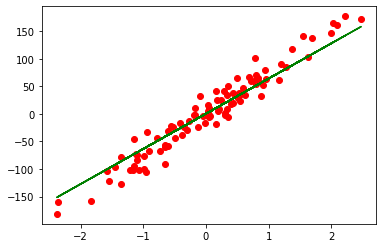

In [ ]:
from sklearn import datasets

X_numpy, y_numpy = datasets.make_regression(n_samples = 100, n_features=1, noise=20, random_state=4)
X = torch.from_numpy(X_numpy.astype(np.float32))
y_t = torch.from_numpy(y_numpy.astype(np.float32))
y = y_t.view(y_t.shape[0], 1)

n_sample, n_features = X.shape
input_size = n_features
output_size = 1
model = nn.Linear(input_size, output_size)

criterion = nn.MSELoss()
opt = torch.optim.SGD(model.parameters(), lr = lr)

lr = 0.01
num_epochs = 100

for epoch in range(num_epochs):
  prediction = model(X)

  loss = criterion(prediction, y)

  loss.backward()

  opt.step()

  opt.zero_grad()

  #if epoch % 1 == 0:
    #print(f'epoch {epoch+1}- loss: {loss.item():.4f}')

predictions = model(X).detach().numpy()

plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, predictions, 'g')

plt.show()